In [66]:
import json
import pandas as pd

with open('../data/data_Bethemont_Golf.json') as f:
  data = json.load(f)

In [67]:
# Convert json to pandas dataframe
df = pd.DataFrame(data['coordinates'])
df

,poi,location,sideFW,hole,latitude,longitude
0,1,3,2,1,48.911822,1.993784
1,1,2,2,1,48.911774,1.993946
2,1,1,2,1,48.911778,1.994194
3,1,3,2,2,48.911176,1.996556
4,1,2,2,2,48.911203,1.996309
...,...,...,...,...,...,...
64,1,1,2,17,48.913671,1.994579
65,1,3,2,18,48.912222,1.997825
66,1,2,2,18,48.912187,1.998027
67,1,1,2,18,48.912269,1.997631


In [68]:
# In df extract all rows where poi = 1 and location = "2"
df_poi = df[(df['poi'] == "1") & (df['location'] == "2")]
df_poi

,poi,location,sideFW,hole,latitude,longitude
1,1,2,2,1,48.911774,1.993946
4,1,2,2,2,48.911203,1.996309
7,1,2,2,3,48.908021,1.993638
10,1,2,2,4,48.906652,1.991763
16,1,2,2,5,48.906766,1.994402
19,1,2,2,6,48.908591,2.000036
23,1,2,2,7,48.909917,1.997858
26,1,2,2,8,48.906926,1.992806
30,1,2,2,9,48.910899,1.997224
35,1,2,2,10,48.909194,2.001136


In [69]:
# I took a screenshop of the sattelite map of the Hole 4, start by giving me all rows from this hole
df_hole4 = df[(df['hole'] == "4")]
df_hole4

,poi,location,sideFW,hole,latitude,longitude
9,1,3,2,4,48.906567,1.991711
10,1,2,2,4,48.906652,1.991763
11,1,1,2,4,48.906758,1.991898
12,3,3,1,4,48.907592,1.992392
13,3,1,1,4,48.907785,1.992624
14,4,1,3,4,48.907166,1.991910


In [70]:
# Lets add missing POI

def add_poi(df, hole,poi, location, lat, long):
    df.loc[len(df)] = [poi, location, "99", hole, lat, long]
    return df

# Add POI 2 to hole 4 with location 1 and lat lon 48.907101, 1.992041
df_hole4 = add_poi(df_hole4, "4", "2", "1", 48.907101, 1.992041)

# Add POI 2 to hole 4 with location 3 and lat lon 48.906795, 1.991973
df_hole4 = add_poi(df_hole4, "4", "2", "3", 48.906795, 1.991973)

df_hole4

/var/folders/bl/dp6k74ln1f93pp54lym_rbmr0000gn/T/ipykernel_68790/1707266788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[len(df)] = [poi, location, "99", hole, lat, long]
/var/folders/bl/dp6k74ln1f93pp54lym_rbmr0000gn/T/ipykernel_68790/1707266788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[len(df)] = [poi, location, "99", hole, lat, long]


,poi,location,sideFW,hole,latitude,longitude
9,1,3,2,4,48.906567,1.991711
10,1,2,2,4,48.906652,1.991763
11,1,1,2,4,48.906758,1.991898
12,3,3,1,4,48.907592,1.992392
13,3,1,1,4,48.907785,1.992624
14,4,1,3,4,48.907166,1.991910
6,2,1,99,4,48.907101,1.992041
7,2,3,99,4,48.906795,1.991973


In [71]:
# Import the image of the hole
from PIL import Image

img = Image.open("../images/hole4.png")

In [72]:
# Print the dimensions of the image
print(img.size)

(988, 1348)


In [44]:
from PIL import ImageDraw
from PIL import Image

draw = ImageDraw.Draw(img)

def lat_lon_to_image_coords(lat, lon, img_width, img_height, lat_min, lat_max, lon_min, lon_max):
    # Normalize latitude and longitude values
    lat = (lat - lat_min) / (lat_max - lat_min)
    lon = (lon - lon_min) / (lon_max - lon_min)

    # Convert to image coordinates
    x = lon * img_width
    y = (1 - lat) * img_height  # Subtract from 1 because image coordinates start from the top

    return int(x), int(y)

# Define the geographical extent of the image
lat_min, lat_max = 48.906378, 48.909397
lon_min, lon_max = 1.991191, 1.994474

# Define the size of the image
img_width, img_height = img.size

In [45]:
# Iterate over the rows in the dataframe
for index, row in df_hole4.iterrows():
    # Get the latitude and longitude of the POI
    lat, lon = row['latitude'], row['longitude']

    # Convert to image coordinates
    x, y = lat_lon_to_image_coords(lat, lon, img_width, img_height, lat_min, lat_max, lon_min, lon_max)

    # Draw the POI on the image
    draw.ellipse((x-10, y-10, x+10, y+10), fill='red')

# Save the image with POIs
img.save('../images/golf_hole_with_pois.png')

# Add all obstacles to the image

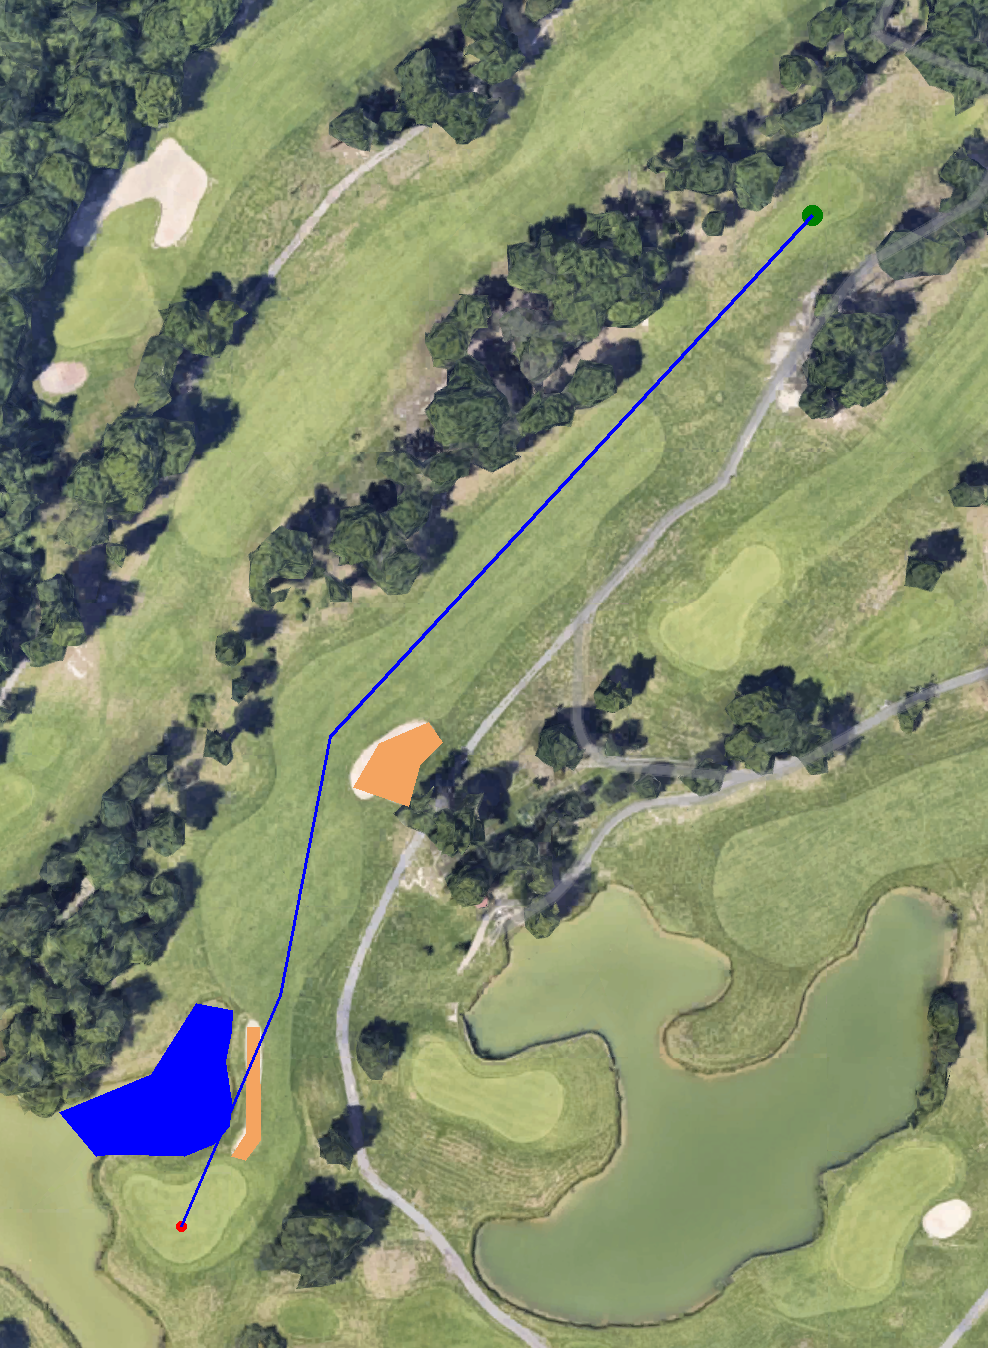

In [63]:
from PIL import Image, ImageDraw

def lat_lon_to_image_coords(lat, lon, img_width, img_height, lat_min, lat_max, lon_min, lon_max):
    lat = (lat - lat_min) / (lat_max - lat_min)
    lon = (lon - lon_min) / (lon_max - lon_min)
    x = lon * img_width
    y = (1 - lat) * img_height
    return int(x), int(y)

def draw_start_end_points(draw, start_coords, end_coords, img_width, img_height):
    """Draw the start (tee) and end (hole) points."""
    start_x, start_y = lat_lon_to_image_coords(*start_coords, img_width, img_height, lat_min, lat_max, lon_min, lon_max)
    end_x, end_y = lat_lon_to_image_coords(*end_coords, img_width, img_height, lat_min, lat_max, lon_min, lon_max)
    
    # Draw start and end points
    draw.ellipse([(start_x - 10, start_y - 10), (start_x + 10, start_y + 10)], fill='green')  # Tee
    draw.ellipse([(end_x - 5, end_y - 5), (end_x + 5, end_y + 5)], fill='red')  # Hole

def draw_path(draw, path, img_width, img_height):
    """Draw the recommended path."""
    image_path = [lat_lon_to_image_coords(lat, lon, img_width, img_height, lat_min, lat_max, lon_min, lon_max) for lat, lon in path]
    draw.line(image_path, fill='blue', width=3)

def draw_obstacle(draw, obstacle_coords, color):
    image_coords = [lat_lon_to_image_coords(lat, lon, img_width, img_height, lat_min, lat_max, lon_min, lon_max)
                    for lat, lon in obstacle_coords]
    draw.polygon(image_coords, outline=color, fill=color)

def parse_obstacle_data(line):
    parts = line.split(',')
    color = parts[1]
    coords = [(float(parts[i]), float(parts[i + 1])) for i in range(2, len(parts), 2)]
    return coords, color

# Load your image
img = Image.open("../images/hole4.png")
draw = ImageDraw.Draw(img)

# Define the geographical extent and image size
lat_min, lat_max, lon_min, lon_max = 48.906378, 48.909397, 1.991191, 1.994474
img_width, img_height = img.size

# Define start (tee) and end (hole) points
start_coords = (48.90891343931512, 1.9938896367494228)
end_coords = (48.90665014147519, 1.991794617313395)

# Define the recommended path (list of lat-lon pairs)
recommended_path = [start_coords, (48.9077481705118, 1.9922902377508251), (48.90716761565869, 1.992124581391877), end_coords]


# Optionally, draw obstacles based on a flag
draw_obstacles = True  # Set to False to not draw obstacles
if draw_obstacles:
    with open("../data/obstacles.txt", "r") as file:
        for line in file:
            coords, color = parse_obstacle_data(line)
            draw_obstacle(draw, coords, color)


# Draw start and end points
draw_start_end_points(draw, start_coords, end_coords, img_width, img_height)

# Draw the recommended path
draw_path(draw, recommended_path, img_width, img_height)

# Save or display the modified image
img.save("hole4_path_and_obstacles.png")
img
